# Importing required Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

## Loading Data Set

In [14]:
from sklearn import datasets

In [15]:
digits = datasets.load_digits()

In [17]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [35]:
print (digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [19]:
type(digits.images)

numpy.ndarray

In [20]:
type(digits.target)

numpy.ndarray

In [21]:
digits.images.shape

(1797, 8, 8)

In [23]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

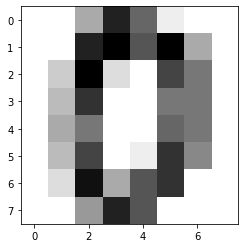

In [24]:
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [25]:
digits.target.shape

(1797,)

In [27]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [29]:
def plot(i):
    '''Plots 15 digits, starting with digit i'''
    nplots = 15
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

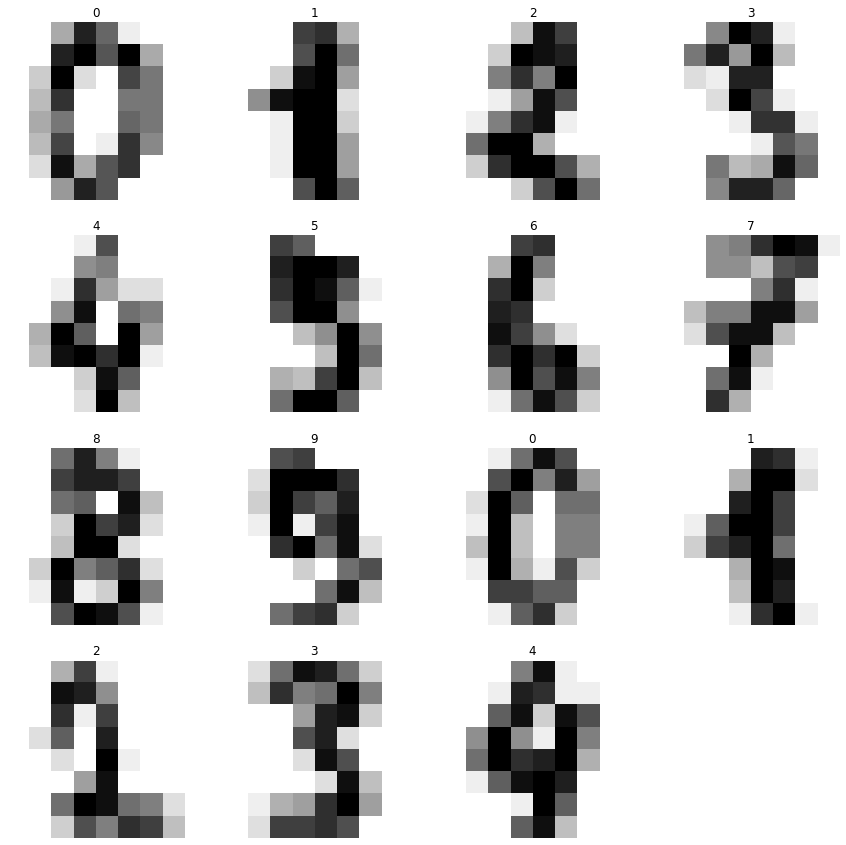

In [30]:
plot(0)

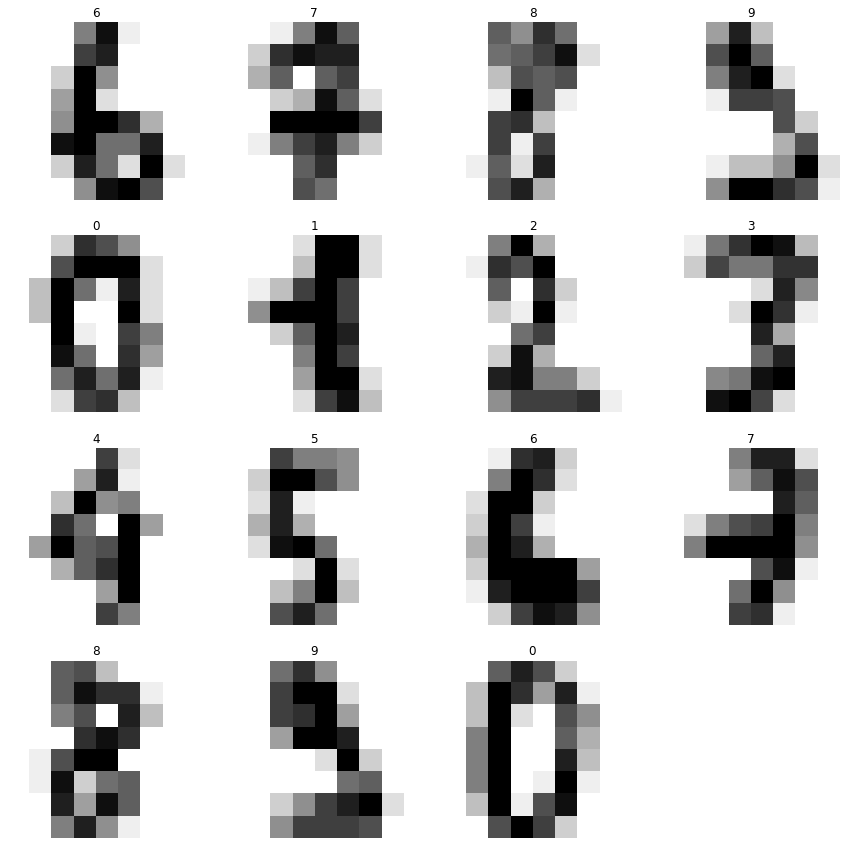

In [31]:
plot(16)

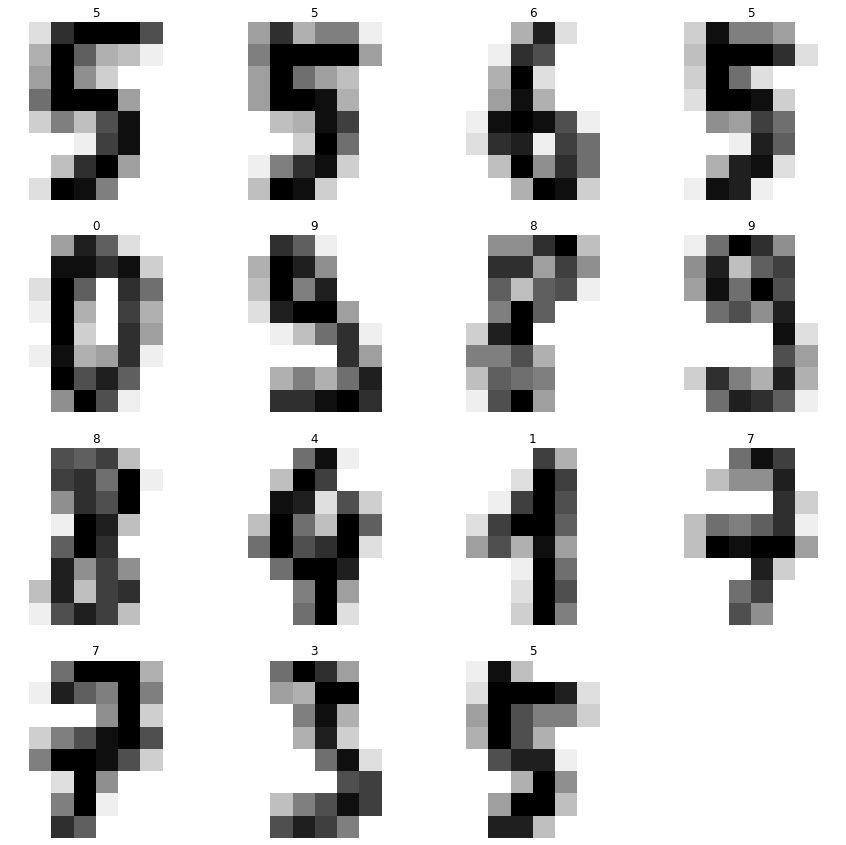

In [32]:
plot(32)

## Spliting Data 

In [36]:
x = digits.data
y = digits.target

In [38]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [39]:
y

array([0, 1, 2, ..., 8, 9, 8])

### Training and Testing parts

In [41]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =0)

## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

# <font color = "green">K Nearest Neighbor</font>

In [44]:
# using sklearn library
# fitting k-NN model

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3, p=2)
knn_classifier.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

### Pedicting Testing_input

In [46]:
y_pred = knn_classifier.predict(xtest)

### Results

In [50]:
# Building confusion MAtrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

In [48]:
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 45]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9711111111111111

# <font color = "green">Random Forest</font>

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

### Predicting Test_input

In [54]:
y_pred = rf_classifier.predict(xtest)

In [55]:
# Building confusion MAtrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

In [56]:
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 45,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 45]], dtype=int64)

In [57]:
# finding accuracy

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9777777777777777

# <font color = "green">Support Vector Regression</font>

In [58]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(xtrain, ytrain)

SVR()

### Prediction

In [59]:
ypred = svr.predict(xtest)

In [63]:
error = mean_squared_error(ypred, ytest)

In [61]:
error

1.261885686612658

In [64]:
100-1.261885686612658

98.73811431338734